## Reading the data file and assigning the column names

In [104]:
import pandas as pd
data = pd.read_csv("data1.txt",names=['Population','Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


## Viewing all data points

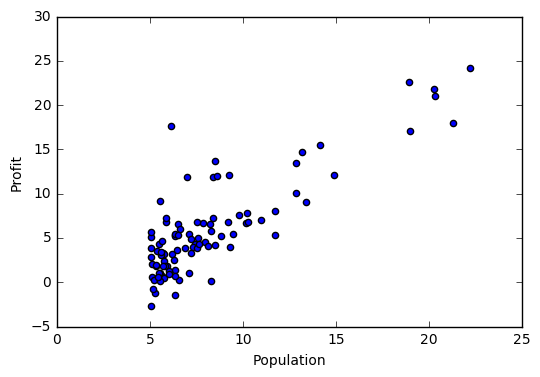

In [105]:
import matplotlib.pyplot as plt
data.plot(x='Population', y='Profit',kind="scatter")
plt.show()

### Adding an additional column of ones to account for the variable for the first theta ( parameter ) 
### h = x0(theta0) + x1(theta1)

In [106]:
data.insert(0,'Ones',1)
data.head()

,Ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


## Creating the X and y matrices for further calculations

In [107]:
X = data.iloc[:,0:2]
y = data.iloc[:,2]
print(X.head())
print("\n")
print(y.head())

   Ones  Population
0     1      6.1101
1     1      5.5277
2     1      8.5186
3     1      7.0032
4     1      5.8598


0    17.5920
1     9.1302
2    13.6620
3    11.8540
4     6.8233
Name: Profit, dtype: float64


In [108]:
import numpy as np
X = np.matrix(X.values)
y = np.matrix(y.values)

## Creating the theta matrix as an array of 0s

In [109]:
theta = np.matrix(np.array([0,0]))
y = y.T

In [110]:
theta

matrix([[0, 0]])

In [111]:
print(X.shape)
print(y.shape)
print(theta.shape)

(97, 2)
(97, 1)
(1, 2)


## Computing the cost function

In [112]:
def computeCost(X, y, theta):  
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

In [113]:
computeCost(X,y,theta)

32.072733877455676

## Initializing variables for the learning rate and number of iterations

In [114]:
alpha = 0.01  
iters = 1000

## Function for gradient descent and computing final values of theta matrix

In [115]:
def gradientDescent(X, y, theta, alpha, iters):  
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)

    for i in range(iters):
        error = (X * theta.T) - y

        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))

        theta = temp
        cost[i] = computeCost(X, y, theta)

    return theta, cost

In [116]:
g, cost = gradientDescent(X, y, theta, alpha, iters)  
g  

matrix([[-3.24140214,  1.1272942 ]])

## Computing the cost for the final theta values

In [117]:
computeCost(X,y,g)

4.5159555030789118

## Plotting the data points and the predictive line

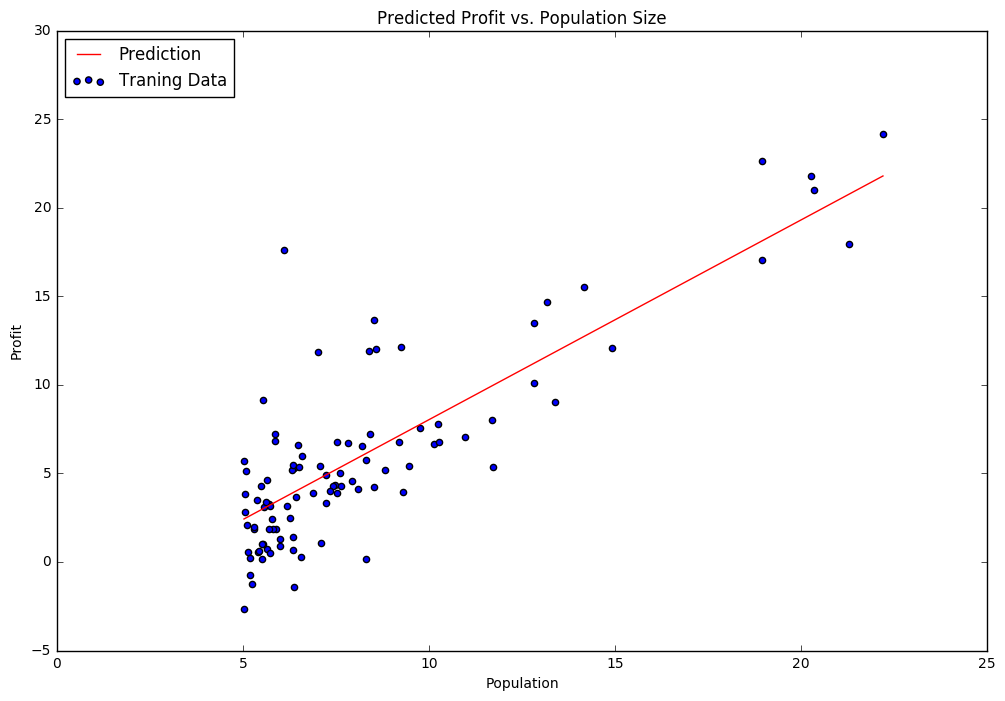

In [118]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)  
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(12,8))  
ax.scatter(data.Population, data.Profit, label='Traning Data') 
ax.plot(x, f, 'r', label='Prediction')  
ax.legend(loc=2)  
ax.set_xlabel('Population')  
ax.set_ylabel('Profit')  
ax.set_title('Predicted Profit vs. Population Size')  
plt.show()

## Plotting the cost as a function of the number of iterations

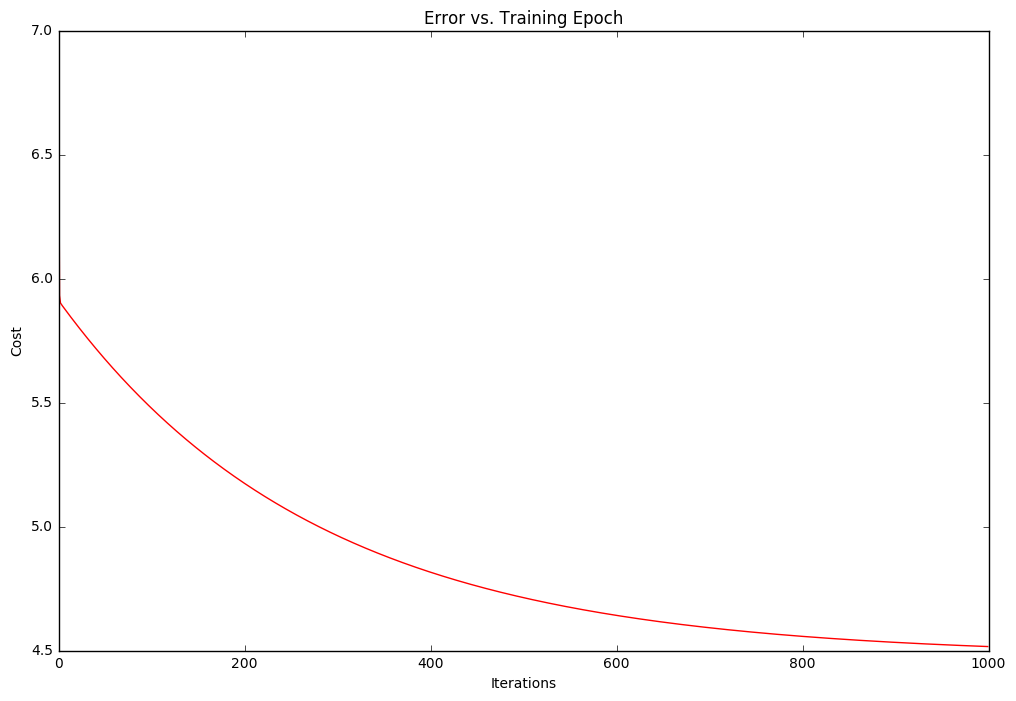

In [119]:
fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(np.arange(iters), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')  
plt.show()

## Predict profits for population sizes of 35,000 and 70,000

In [123]:
result1 = [1,35]*g.T
result2 = [1,70]*g.T

In [124]:
print(result1)

[[ 36.21389494]]


In [125]:
print(result2)

[[ 75.66919203]]
